# House Price Prediction Model

**Descripton** Previous model had only one feature (`size`) to predict the price of the house. In real-world, there are many factors like `# bedrooms`, `# bathrooms`, `city`, etc that affect the price of the house. In this project, I will use `Multiple Linear Regression` to predict the price of the house via  


In [899]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from mpl_toolkits.mplot3d import Axes3D
np.seterr(divide='ignore', invalid='ignore')
np.set_printoptions(precision=2)

In [900]:
data_set = pd.read_csv("./data/zameen.csv", delimiter="|")

In [901]:
data_set.tail(2)

,city,location,price,bedrooms,baths,size
16017,Attock,"Madni Colony, Attock",22500000,5,4,2250.0
16018,Attock,"Attock Road, Attock",3500000,3,2,675.0


## Cleaning data

- removing null value rows (if any)


In [902]:
# find the missing values if any
data_set.isna().sum()

city        0
location    0
price       0
bedrooms    0
baths       0
size        0
dtype: int64

<AxesSubplot: xlabel='city'>

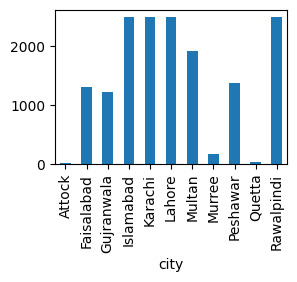

In [903]:
# make a pie chart for this data set
data_set.groupby("city").size().plot(kind="bar", figsize=(3,2))

# Removing Unnecessory Columns

- `city` and `location` colums are no longer required


In [904]:
data_set = data_set.drop(["city", "location"], axis = 1)

data_set.head(1)

,price,bedrooms,baths,size
0,74500000,5,6,4500.0


# Building Model

In [905]:
def compute_model(x, w, b):
    """
    X: (n,n)    list of feature values
    w: (n,)     the weights of each feature
    b: scaler   bias (y-intercept / error term)
    """
    f_wb =  np.dot(w, x) + b

    return f_wb

# Splitting 

- `X`: feature matrix 
- `y`: target list

In [906]:
y = data_set["price"]
X = data_set.drop(["price"], axis=1)


print("X.shape =", X.shape)
print("y.shape =", y.shape)

X.shape = (16019, 3)
y.shape = (16019,)


# Feature Scalling

`price`, `bedrooms`, `baths` and `size` needs rescalling because their values are too high

In [907]:
def z_score_rescale_features(X):
    sigma = X.std(axis=0)
    mu = X.mean(axis=0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [908]:
# rescale features using z-score
rescaled_X, X_mu, X_sigma = z_score_rescale_features(X)

# convert to numpy array
rescaled_X = rescaled_X.to_numpy()

In [909]:
def compute_cost(X, y, w, b): 
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar 
    print(cost)   
    return cost

In [910]:
def compute_gradient(x, y, w, b):
    """
    X: (m, n)   matric having features
    y: (m,)     target values
    w: (n,)     weights of the features
    b: scaler   bias / error term
    """
    m, n = x.shape

    dj_dw = np.zeros((n))
    dj_db = 0

    for i in range(m):
        f_wb = np.dot(w, x[i]) + b

        dj_dw += ((f_wb - y[i]) * x[i])
        dj_db += (f_wb - y[i])

    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db


In [911]:
def gradient_descent(X, y, w_inits, b_init, alpha, num_iters):
    """
    X: (n, n)           matric having features
    y: (n,)             list of target value
    w_inits: (n,)       initial values of w 
    b_init: scaler      initial value of b 
    alpha: scaler       learning rate
    num_iters: scaler   number of iterations to be performed
    """
    w = w_inits
    b = b_init

    prev_w = np.array([])
    prev_b = 0
    
    for iter in range(num_iters):
        dj_dw, dj_db =  compute_gradient(X, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db


        if np.array_equal(w, prev_w) and prev_b == b:
            print(f"Found the values of parameters early on iteration #{iter}")
            break

        prev_w = w
        prev_b = b

        # Print cost every at intervals 10 times or as many iterations if < 10
        # if iter% math.ceil(num_iters / 10) == 0:
        print(f"Iteration {iter:4d}: Cost {compute_cost(X, y, w, b)}")
        

    return w, b

# Sample data from dataset

| city   | location                    | price    | bedrooms | baths | size |
| ------ | --------------------------- | -------- | -------- | ----- | ---- |
| Lahore | DHA Phase 6, DHA Defence    | 74500000 | 5        | 6     | 4500 |
| Lahore | DHA Phase 7, DHA Defence    | 51500000 | 5        | 6     | 4500 |
| Lahore | Dream Gardens, Defence Road | 7500000  | 1        | 1     | 518  |
| Lahore | DHA Phase 6, DHA Defence    | 73000000 | 5        | 6     | 4500 |


# Calculating the optimum parameter values

In [917]:
# w = np.zeros((3,))
# b = 0

# w, b = gradient_descent(rescaled_X, y, w, b, 0.01, 100_000)

## Predict

It took `16344 iterations` to find the parameters below in `1.28` hours on `Google Colab`.

- w = [ 28089641.18, -11119919.88,  39453992.42]
- b = 45706463.38722768

In [919]:
def predict( mu, sigma, w, b, beds, baths, size):
    x_house = np.array([beds, baths, size])
    x_house_norm = (x_house - mu) / sigma

    price = np.dot(w, x_house_norm) + b
    
    return price

In [921]:
w = np.array([ 28089641.18, -11119919.88,  39453992.42])
b = 45706463.38722768

predict(X_mu, X_sigma, w, b, 5, 6, 2250)

51083960.321210876

In [916]:
try:
    x = X.to_numpy()
except:
    pass

# create 3D scatter plot
scatter = go.Scatter3d(x=x[:,0],
                       y=x[:,1],
                       z=x[:,2],
                       mode='markers',
                       marker=dict(size=5))

# create a linear sheet that cuts through the data
new_x = np.linspace(min(x[:,0]), max(x[:,0]), 10)
new_y = np.linspace(min(x[:,1]), max(x[:,1]), 10)
X, Y = np.meshgrid(new_x, new_y)
Z = X + Y

# create 3D surface plot of the linear sheet
surface = go.Surface(x=X, y=Y, z=Z, opacity=0.5)

# create figure and add scatter and surface plots
fig = go.Figure(data=[scatter, surface])

# set labels for each axis
fig.update_layout(scene=dict(xaxis_title='#Bedrooms',
                             yaxis_title='#Baths',
                             zaxis_title='Size(Sqft)'))

# display the plot
fig.show()